In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('AAPL.csv')
data.head()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552 entries, 0 to 2551
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2552 non-null   object 
 1   Open       2552 non-null   float64
 2   High       2552 non-null   float64
 3   Low        2552 non-null   float64
 4   Close      2552 non-null   float64
 5   Adj Close  2552 non-null   float64
 6   Volume     2552 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 139.7+ KB
None


In [3]:
data = data[['Date','Open','Close','Volume']] # Extracting required columns
data['Date'] = pd.to_datetime(data['Date'].apply(lambda x: x.split()[0])) # Selecting only date
data.set_index('Date',drop=True,inplace=True) # Setting date column as index
data.tail()

,Open,Close,Volume
Date,,,
2022-02-15,170.970001,172.789993,64286300
2022-02-16,171.850006,172.550003,61177400
2022-02-17,171.029999,168.880005,69589300
2022-02-18,169.820007,167.300003,82614200
2022-02-22,164.979996,164.320007,91004600


In [4]:
ma_day = [10, 20, 30, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Close'].rolling(ma).mean()

data.tail()

,Open,Close,Volume,MA for 10 days,MA for 20 days,MA for 30 days,MA for 50 days
Date,,,,,,,
2022-02-15,170.970001,172.789993,64286300,172.632999,168.975499,170.538666,172.5192
2022-02-16,171.850006,172.550003,61177400,172.303999,169.291499,170.300333,172.6638
2022-02-17,171.029999,168.880005,69589300,171.902000,169.510000,170.099000,172.6178
2022-02-18,169.820007,167.300003,82614200,171.393001,169.754500,169.942333,172.4622
2022-02-22,164.979996,164.320007,91004600,170.659001,169.889500,169.680667,172.2574


In [5]:
data.fillna(0)

,Open,Close,Volume,MA for 10 days,MA for 20 days,MA for 30 days,MA for 50 days
Date,,,,,,,
2012-01-03,14.621429,14.686786,302220800,0.000000,0.000000,0.000000,0.0000
2012-01-04,14.642857,14.765714,260022000,0.000000,0.000000,0.000000,0.0000
2012-01-05,14.819643,14.929643,271269600,0.000000,0.000000,0.000000,0.0000
2012-01-06,14.991786,15.085714,318292800,0.000000,0.000000,0.000000,0.0000
2012-01-09,15.196429,15.061786,394024400,0.000000,0.000000,0.000000,0.0000
...,...,...,...,...,...,...,...
2022-02-15,170.970001,172.789993,64286300,172.632999,168.975499,170.538666,172.5192
2022-02-16,171.850006,172.550003,61177400,172.303999,169.291499,170.300333,172.6638
2022-02-17,171.029999,168.880005,69589300,171.902000,169.510000,170.099000,172.6178


C:\Users\amith\AppData\Local\Temp/ipykernel_16272/3420476719.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


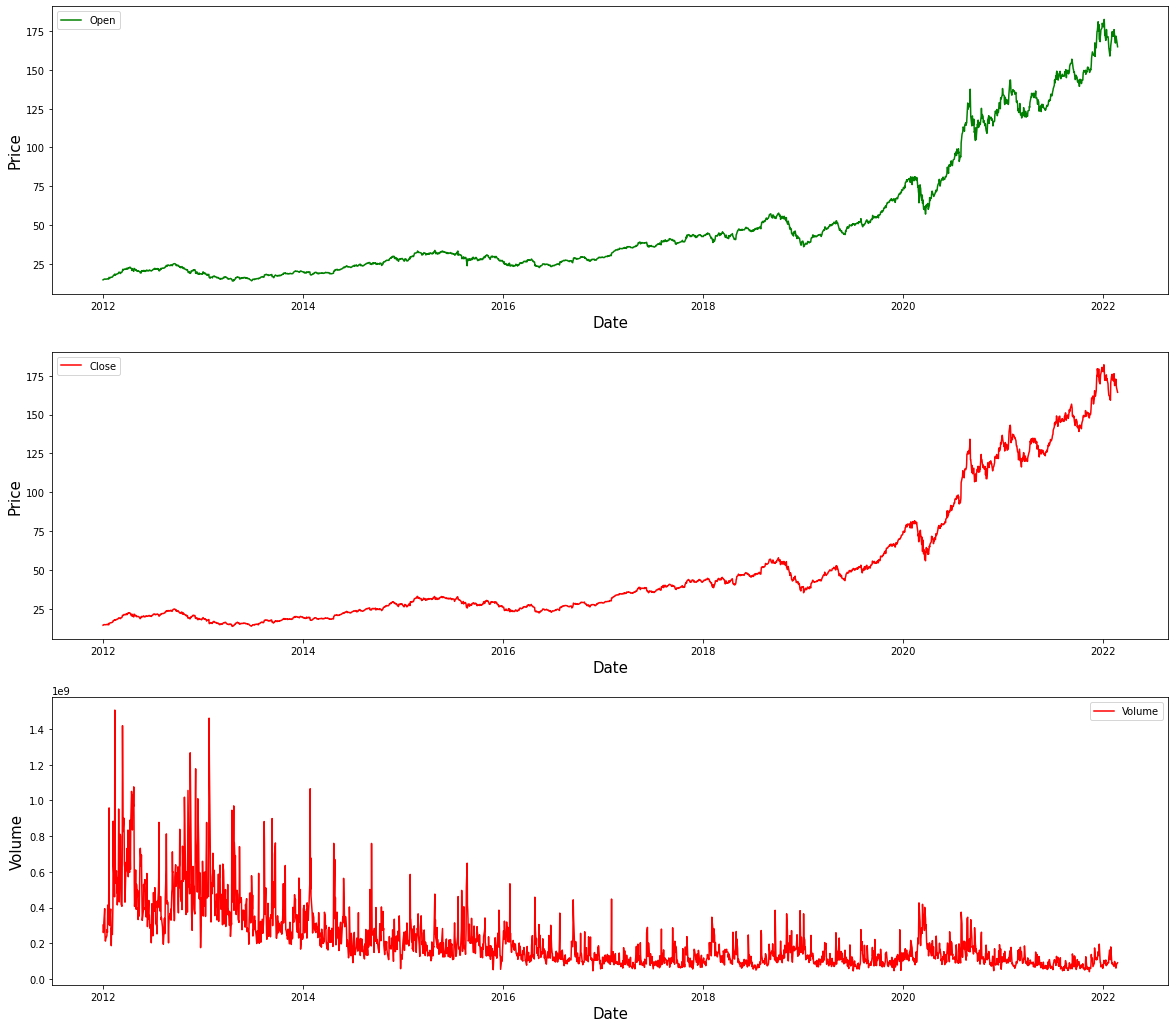

In [6]:
fg, ax =plt.subplots(3,1,figsize=(20,18))
ax[0].plot(data['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(data['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

ax[2].plot(data['Volume'],label='Volume',color='red')
ax[2].set_xlabel('Date',size=15)
ax[2].set_ylabel('Volume',size=15)
ax[2].legend()
fg.show()

Text(0.5, 1.0, 'Apple')

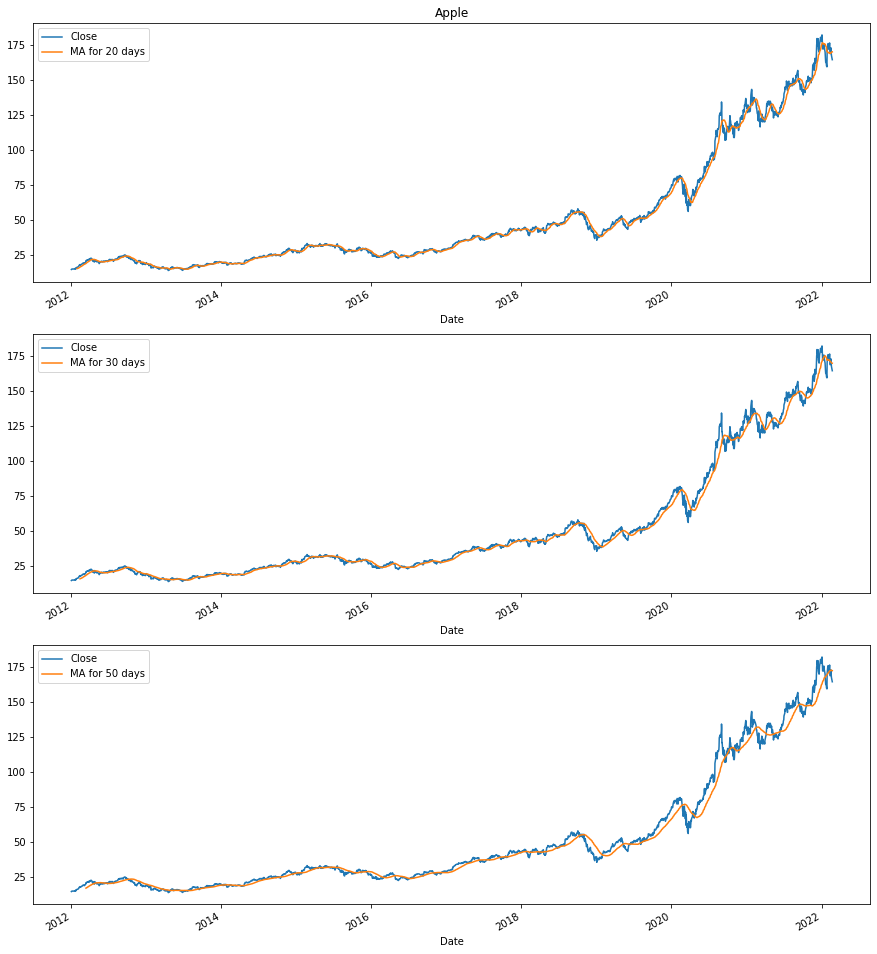

In [7]:
fig,axes = plt.subplots(nrows=3,ncols=1)
fig.set_figheight(18)
fig.set_figwidth(15)

data[['Close', 'MA for 20 days']].plot(ax=axes[0])
data[['Close', 'MA for 30 days']].plot(ax=axes[1])
data[['Close', 'MA for 50 days']].plot(ax=axes[2])
axes[0].set_title('Apple')

In [8]:
rmse_ma20 = np.sqrt(np.mean(((data['Close'] - data['MA for 20 days']) ** 2)))
print('rmse for moving average 20 days ',rmse_ma20)
rmse_ma30 = np.sqrt(np.mean(((data['Close'] - data['MA for 30 days']) ** 2)))
print('rmse for moving average 30 days ',rmse_ma30)
rmse_ma50 = np.sqrt(np.mean(((data['Close'] - data['MA for 50 days']) ** 2)))
print('rmse for moving average 50 days ',rmse_ma50)

mape_ma20 = np.mean(np.abs((((data['Close']-data['MA for 20 days']) / data['Close']))*100))
print('mape for moving average 20 days ',mape_ma20)
mape_ma30 = np.mean(np.abs((((data['Close']-data['MA for 30 days']) / data['Close']))*100))
print('mape for moving average 30 days ',mape_ma30)
mape_ma50 = np.mean(np.abs((((data['Close']-data['MA for 50 days']) / data['Close']))*100))
print('mape for moving average 50 days ',mape_ma50)

rmse for moving average 20 days  2.9164911697954534
rmse for moving average 30 days  3.7033746879743634
rmse for moving average 50 days  4.89926893009763
mape for moving average 20 days  3.423056607746975
mape for moving average 30 days  4.391872714724746
mape for moving average 50 days  5.815505461362039


In [9]:
data = data.iloc[:,1:2]
data

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2022-02-15,172.789993
2022-02-16,172.550003
2022-02-17,168.880005


In [10]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler(feature_range=(0,1))
data[data.columns] = MMS.fit_transform(data)

In [13]:
data.shape

(2552, 1)

In [14]:
training_size = round(len(data) * 0.75) # Selecting 75 % for training and 25% for testing
training_size

1914

In [15]:
train_data = data[:training_size]
test_data  = data.iloc[training_size:]

train_data.shape, test_data.shape 
#type(google_stock_data)

((1914, 1), (638, 1))

In [16]:
def createSequence(dataset):
  sequences = []
  labels = []
  start_index = 0

  for stop_index in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_index:stop_index])
    labels.append(dataset.iloc[stop_index])
    start_index += 1
    
  return (np.array(sequences),np.array(labels))

In [17]:
train_seq, train_label = createSequence(train_data)
test_seq, test_label = createSequence(test_data)

#train_label = train_label[:,0:2]
#test_label = test_label[:,0:2]

#train_seq[np.isnan(train_seq)] = 0
#test_seq[np.isnan(test_seq)] = 0
#np.nan_to_num(train_seq)
#np.nan_to_num(test_seq)
#print(train_seq[0])
#print(test_seq[0])

In [18]:

print("tss ", train_seq.shape)
print("tsl " , train_label.shape)

print("testss ", test_seq.shape)
print("testsl " , test_label.shape)

tss  (1864, 50, 1)
tsl  (1864, 1)
testss  (588, 50, 1)
testsl  (588, 1)


In [19]:
conda install -c conda-forge keras

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional, Flatten

In [22]:
model = Sequential()
model.add(LSTM(units=130, return_sequences=True, 
               input_shape = (train_seq.shape[1],1)))
model.add(LSTM(units=65))
model.add(Dense(30))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 130)           68640     
                                                                 
 lstm_1 (LSTM)               (None, 65)                50960     
                                                                 
 dense (Dense)               (None, 30)                1980      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 121,611
Trainable params: 121,611
Non-trainable params: 0
_________________________________________________________________


In [23]:
print(train_seq.shape, train_label.shape, test_seq.shape, test_label.shape)

(1864, 50, 1) (1864, 1) (588, 50, 1) (588, 1)


In [24]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
59/59 [==============================] - 6s 46ms/step - loss: 8.2492e-04 - val_loss: 9.1511e-04
Epoch 2/80
59/59 [==============================] - 2s 32ms/step - loss: 5.0637e-05 - val_loss: 8.0159e-04
Epoch 3/80
59/59 [==============================] - 2s 30ms/step - loss: 5.2576e-05 - val_loss: 0.0020
Epoch 4/80
59/59 [==============================] - 2s 30ms/step - loss: 4.6526e-05 - val_loss: 0.0018
Epoch 5/80
59/59 [==============================] - 2s 30ms/step - loss: 4.3429e-05 - val_loss: 0.0015
Epoch 6/80
59/59 [==============================] - 2s 30ms/step - loss: 4.2560e-05 - val_loss: 0.0026
Epoch 7/80
59/59 [==============================] - 2s 30ms/step - loss: 4.1128e-05 - val_loss: 0.0011
Epoch 8/80
59/59 [==============================] - 2s 31ms/step - loss: 3.8088e-05 - val_loss: 0.0017
Epoch 9/80
59/59 [==============================] - 2s 31ms/step - loss: 3.7485e-05 - val_loss: 0.0012
Epoch 10/80
59/59 [==============================] - 2s 34ms/step

Epoch 78/80
59/59 [==============================] - 2s 34ms/step - loss: 1.4143e-05 - val_loss: 4.4107e-04
Epoch 79/80
59/59 [==============================] - 2s 39ms/step - loss: 1.1920e-05 - val_loss: 2.4717e-04
Epoch 80/80
59/59 [==============================] - 2s 32ms/step - loss: 1.2627e-05 - val_loss: 4.1739e-04


In [25]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

array([[0.2832732 ],
       [0.28812927],
       [0.2887367 ],
       [0.29331404],
       [0.2970935 ]], dtype=float32)

In [26]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[61.5551  ],
       [62.371223],
       [62.47331 ],
       [63.242588],
       [63.877777]], dtype=float32)

In [27]:
merge_data = pd.concat([data.iloc[-588:].copy(),pd.DataFrame(test_inverse_predicted,columns=['close_predicted'],index=data.iloc[-588:].index)], axis=1)

In [28]:
merge_data[['Close']] = MMS.inverse_transform(merge_data[['Close']]) # Inverse scaling

In [29]:
merge_data.head()

,Close,close_predicted
Date,,
2019-10-23,60.794998,61.555099
2019-10-24,60.895000,62.371223
2019-10-25,61.645000,62.473309
2019-10-28,62.262501,63.242588
2019-10-29,60.822498,63.877777


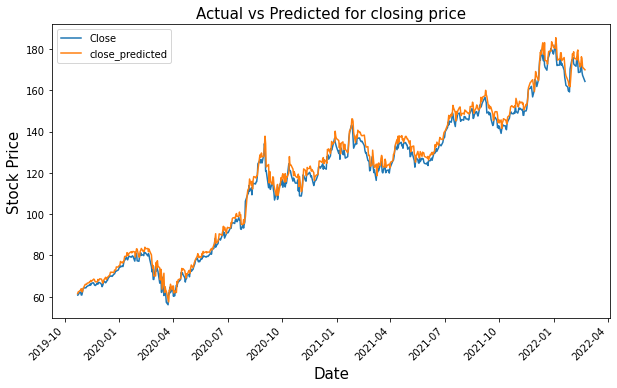

In [30]:
merge_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for closing price',size=15)
plt.show()

In [31]:
rmse = np.sqrt(np.mean(((merge_data['Close'] - merge_data['close_predicted']) ** 2)))
rmse

3.433530198538668

In [32]:
mape = np.mean(np.abs(((merge_data['Close']-merge_data['close_predicted']) / merge_data['Close']))*100)
print(mape)

2.4943393611805114
